In [2]:
import pandas as pd
df = pd.read_csv("c:/data/rides/rides.csv")
print(df.head())

  weekend  num.child    distance  rides  games  wait  clean  overall
0     yes          0  114.648259     87     73    60     89       47
1     yes          2   27.014097     87     78    76     87       65
2      no          1   63.300975     85     80    70     88       61
3     yes          0   25.909931     88     72    66     89       37
4      no          4   54.718307     84     87    74     87       68


In [3]:
x=df["rides"].values
print(x[:10])
y=df["overall"].values
print(y[:10])

[87 87 85 88 84 81 77 82 90 88]
[47 65 61 37 68 27 40 30 58 36]


In [4]:
from scipy import stats

result=stats.linregress(x,y)
result

LinregressResult(slope=1.7032854834102114, intercept=-94.962245608833, rvalue=0.5859862820034292, pvalue=1.9715137881093238e-47, stderr=0.10554615174616568, intercept_stderr=9.079004880770858)

Text(0, 0.5, '전체 만족도')

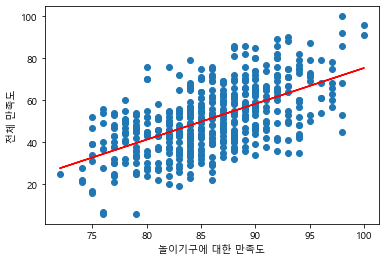

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

slope, intercept, r_value, p_value, stderr=stats.linregress(x,y)

plt.scatter(x,y)
plt.plot(x, slope*x +intercept, c="red")
plt.xlabel("놀이기구에 대한 만족도") 
plt.ylabel("전체 만족도") 

In [6]:
90 * slope + intercept

58.33344789808601

In [7]:
df2=pd.get_dummies(df['weekend'],prefix='weekend')
df=pd.concat([df,df2],axis=1)
del df['weekend']
df.head()

,num.child,distance,rides,games,wait,clean,overall,weekend_no,weekend_yes
0,0,114.648259,87,73,60,89,47,0,1
1,2,27.014097,87,78,76,87,65,0,1
2,1,63.300975,85,80,70,88,61,1,0
3,0,25.909931,88,72,66,89,37,0,1
4,4,54.718307,84,87,74,87,68,1,0


In [8]:
X=df[['num.child', 'distance', 'rides', 'games', 'wait', 'clean', 'weekend_no', 'weekend_yes']]
y=df['overall']

In [9]:
import statsmodels.api as sm
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     151.6
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.73e-118
Time:                        11:53:08   Log-Likelihood:                -1804.1
No. Observations:                 500   AIC:                             3624.
Df Residuals:                     492   BIC:                             3658.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
num.child       3.6160      0.270     13.403      0.000       3.086       4.146
distance        0.0449      0.012      3.686      0.000       0.021       0.069
rides           0.6136      0.121      5.072      0.000       0.376       0.851
games           0.1383      0.059      2.356      0.019       0.023       0.254
wait            0.5648      0.041     13.896      0.000       0.485       0.645
clean           0.9272      0.136      6.821      0.000       0.660       1.194
weekend_no   -140.6125      7.154    -19.655      0.000    -154.669    -126.556
weekend_yes  -141.3283      7.121    -19.847      0.000    -155.319    -127.337
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.943
Skew:                          -0.050   Prob(JB):                        0.379
Kurtosis:                       2.712   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
result.predict([2, 20, 80, 70, 80, 90, 0, 1])

array([54.20768166])

In [11]:
result.predict([3, 10, 80, 70, 80, 90, 1, 0])


array([58.09006564])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model=LinearRegression().fit(X_train, y_train)

In [13]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.6670609590984946
0.7212343349658574


In [14]:
model.predict([[2, 20, 80, 70, 80, 90, 0, 1]])

array([53.30062057])

In [15]:
model.predict([[3, 10, 80, 70, 80, 90, 1, 0]])

array([57.97589809])

In [16]:
import joblib
joblib.dump(model, 'c:/data/rides/rides_regress.model')

['c:/data/rides/rides_regress.model']